In [125]:
%matplotlib inline
import random

import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [126]:
url = "https://uk.wikipedia.org/wiki/Населення_України"
page_html = requests.get(url=url).text

In [127]:
tabs = pd.read_html(page_html, match='Коефіцієнт народжуваності в регіонах України')
df = tabs[0]

In [128]:
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


In [129]:
# Task 1.1 Вивести перші рядки таблиці за допомогою методу head
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [130]:
# Task 1.2 Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
df.shape

(28, 9)

In [131]:
# Task 1.3 Замініть у таблиці значення "—" на значення NaN
df = df.replace("—", "Nan")

In [132]:
# Task 1.4 Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [133]:
# Task 1.5 Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
df = pd.concat([df["Регіон"], df.iloc[:, 1:].astype(np.float64)], axis=1)

In [134]:
# Task 1.6 Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
columns = df.columns
total_missing_data = np.sum(pd.isnull(df[columns[1:]]))

In [135]:
total_missing_data

1950    2
1960    1
1970    1
1990    0
2000    0
2012    0
2014    2
2019    4
dtype: int64

In [136]:
# Task 1.7 Видаліть з таблиці дані по всій країні, останній рядок таблиці
df = df.drop([27])

In [137]:
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130.0,73.0,126.0,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124.0,84.0,112.0,109.0,76.0
2,Волинська,247.0,250.0,179.0,153.0,112.0,148.0,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123.0,71.0,112.0,111.0,71.0
4,Донецька,271.0,214.0,140.0,109.0,61.0,98.0,82.0,NaN
5,Житомирська,261.0,223.0,159.0,129.0,89.0,122.0,120.0,79.0
6,Закарпатська,314.0,273.0,207.0,168.0,115.0,151.0,146.0,104.0
7,Запорізька,219.0,197.0,150.0,124.0,71.0,106.0,106.0,68.0
8,Івано-Франківська,243.0,248.0,182.0,155.0,103.0,124.0,122.0,88.0
9,Київська,204.0,189.0,156.0,123.0,73.0,122.0,121.0,80.0


In [138]:
# Task 1.8 Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
values = {
    "1950": df["1950"].mean(),
    "1960": df["1960"].mean(),
    "1970": df["1970"].mean(),
    "2014": df["2014"].mean(),
    "2019": df["2019"].mean(),
}
df = df.fillna(value=values)

In [139]:
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.000000,160.0,130.0,73.0,126.0,111.44,80.173913
1,Вінницька,224.00,192.000000,142.0,124.0,84.0,112.0,109.00,76.000000
2,Волинська,247.00,250.000000,179.0,153.0,112.0,148.0,141.00,101.000000
3,Дніпропетровська,204.00,204.000000,151.0,123.0,71.0,112.0,111.00,71.000000
4,Донецька,271.00,214.000000,140.0,109.0,61.0,98.0,82.00,80.173913
5,Житомирська,261.00,223.000000,159.0,129.0,89.0,122.0,120.00,79.000000
6,Закарпатська,314.00,273.000000,207.0,168.0,115.0,151.0,146.00,104.000000
7,Запорізька,219.00,197.000000,150.0,124.0,71.0,106.0,106.00,68.000000
8,Івано-Франківська,243.00,248.000000,182.0,155.0,103.0,124.0,122.00,88.000000
9,Київська,204.00,189.000000,156.0,123.0,73.0,122.0,121.00,80.000000


In [140]:
# Task 1.9 Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
y_2019_mean = df["2019"].mean()
result = df[df["2019"] > y_2019_mean][["Регіон", "2019"]]

In [141]:
result

,Регіон,2019
2,Волинська,101.0
6,Закарпатська,104.0
8,Івано-Франківська,88.0
12,Львівська,87.0
14,Одеська,88.0
16,Рівненська,107.0
20,Херсонська,81.0
23,Чернівецька,92.0
25,Київ,110.0


In [143]:
# Task 1.10 У якому регіоні була найвища народжуваність у 2014 році?
max_2014 = df["2014"].max()
max_2014_region = df[df["2014"] == max_2014][["Регіон"]]

In [144]:
max_2014_region

,Регіон
16,Рівненська


In [41]:
# Task 1.11 Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

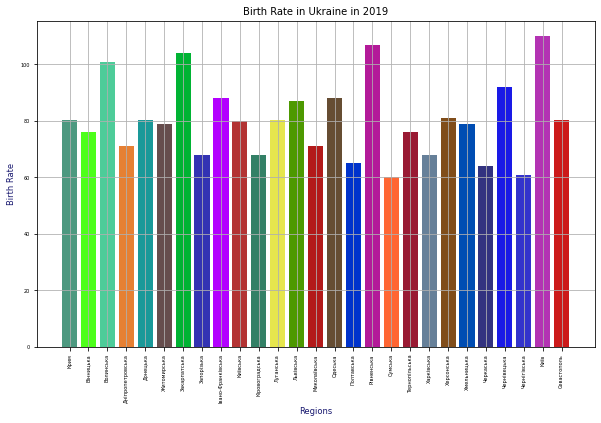

In [145]:
year_14 = df["2019"]
regions = df["Регіон"]

def rgb_colors(arg: int):
    counter = 0
    result = []
    while counter < arg:
        random_color = (
            round(random.random(), 1),
            round(random.random(), 1),
            round(random.random(), 1),
        )
        result.append(random_color)
        counter += 1
    return result


colors = rgb_colors(len(regions))

plt.figure(figsize=(10, 6))
plt.bar(regions, year_14, color=colors)
plt.xticks(rotation=90)
plt.tick_params(axis="both", labelsize=5)
plt.title("Birth Rate in Ukraine in 2019", fontsize=10)
plt.xlabel("Regions", fontsize="small", color="midnightblue")
plt.ylabel("Birth Rate", fontsize="small", color="midnightblue")
plt.grid()
plt.show()

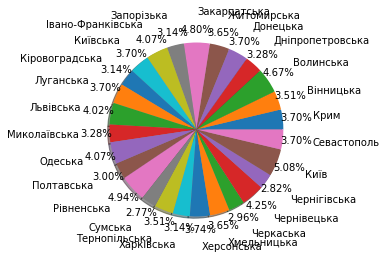

In [146]:
# Chart 1
plt.pie(
    year_14,
    labels=regions,
    shadow=True,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.show()
plt.close("all")

In [147]:
df["2012"].agg(["min", "max"])

min     94.0
max    159.0
Name: 2012, dtype: float64

<AxesSubplot:title={'center':'Розподіл коефіціенту народжуванності в Україні в 2012 році.'}, ylabel='Density'>

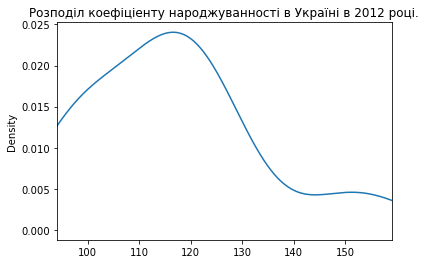

In [148]:
# Chart 3
df["2012"].plot(kind="kde", xlim=[94, 159], title="Розподіл коефіціенту народжуванності в Україні в 2012 році.")